In [2]:
import pandas as pd
import numpy as np

## Key Questions
## Refactored Key Questions
- Which **counties** in Colorado have the highest number of business filings?
- What specific **regions** in Colorado show the highest number of business filings? *(Note: Define "regions" if it refers to specific geographical/administrative areas.)*
- At the state level, which **types of businesses** or **industries** are most prevalent?
- On a county basis, which **types of businesses** or **industries** are most common?
- In different regions, what are the most common **types of businesses** or **industries**?
- **Trend Analysis:** Is there an increasing trend in the number of business filings in Colorado over the past 5 years?
- **Trend Analysis:** What has been the trend in business filings over the past 10 years?
- **Trend Analysis:** How have business filings varied month-over-month in the last 12 months?


In [3]:
# import business.csv
df = pd.read_csv('Business.csv')

In [4]:
df.head()

,entityid,entityname,principaladdress1,principaladdress2,principalcity,principalstate,principalzipcode,principalcountry,mailingaddress1,mailingaddress2,...,agentprincipalstate,agentprincipalzipcode,agentprincipalcountry,agentmailingaddress1,agentmailingaddress2,agentmailingcity,agentmailingstate,agentmailingzipcode,agentmailingcountry,entityformdate
0,18861217679,"DENVER UNION CORPROATION, Dissolved January 17...",1512 LARIMER STREET #760,NaN,Denver,CO,80202,NaN,NaN,NaN,...,CO,80202,US,NaN,NaN,NaN,NaN,NaN,NaN,03/29/1886
1,19871114819,GROWER-SHIPPER POTATO COMPANY,0132 CO RD 34,NaN,Monte Vista,CO,81144,US,PO BOX 432,NaN,...,CO,81101,US,PO BOX 809,NaN,ALAMOSA,CO,81101,US,06/28/1948
2,18911012261,"GRADEN MERCANTILE COMPANY (THE), Dissolved May...",777 Main Ave.,NaN,Durango,CO,801302,US,P.O. Box Dr F,NaN,...,CO,81301,US,NaN,NaN,NaN,NaN,NaN,NaN,07/01/1891
3,19031090218,"A. CARBONE AND COMPANY, INC., Dissolved Decemb...",846 East Eighteenth Avenue,NaN,Denver,CO,80218,US,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03/31/1903
4,19871132823,"WIREMAN'S BROTHERHOOD FUND, INC.",5660 Logan St,NaN,Denver,CO,80216,US,NaN,NaN,...,CO,80216,US,NaN,NaN,NaN,NaN,NaN,NaN,06/18/1956


In [5]:
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)


Number of rows: 2586441
Number of columns: 35


In [12]:
df['entityformdate'] = pd.to_datetime(df['entityformdate']).dt.date
df.dtypes

entityid                   int64
entityname                object
principaladdress1         object
principaladdress2         object
principalcity             object
principalstate            object
principalzipcode          object
principalcountry          object
mailingaddress1           object
mailingaddress2           object
mailingcity               object
mailingstate              object
mailingzipcode            object
mailingcountry            object
entitystatus              object
jurisdictonofformation    object
entitytype                object
agentfirstname            object
agentmiddlename           object
agentlastname             object
agentsuffix               object
agentorganizationname     object
agentprincipaladdress1    object
agentprincipaladdress2    object
agentprincipalcity        object
agentprincipalstate       object
agentprincipalzipcode     object
agentprincipalcountry     object
agentmailingaddress1      object
agentmailingaddress2      object
agentmaili

In [14]:
date_range = (df['entityformdate'].min().strftime('%Y-%m-%d'), df['entityformdate'].max().strftime('%Y-%m-%d'))
print("Range of business formation dates:", date_range)


Range of business formation dates: ('1864-03-05', '2023-12-26')


In [15]:
# what counties are represented?
df.columns

Index(['entityid', 'entityname', 'principaladdress1', 'principaladdress2',
       'principalcity', 'principalstate', 'principalzipcode',
       'principalcountry', 'mailingaddress1', 'mailingaddress2', 'mailingcity',
       'mailingstate', 'mailingzipcode', 'mailingcountry', 'entitystatus',
       'jurisdictonofformation', 'entitytype', 'agentfirstname',
       'agentmiddlename', 'agentlastname', 'agentsuffix',
       'agentorganizationname', 'agentprincipaladdress1',
       'agentprincipaladdress2', 'agentprincipalcity', 'agentprincipalstate',
       'agentprincipalzipcode', 'agentprincipalcountry',
       'agentmailingaddress1', 'agentmailingaddress2', 'agentmailingcity',
       'agentmailingstate', 'agentmailingzipcode', 'agentmailingcountry',
       'entityformdate'],
      dtype='object')

In [17]:
# what zip codes are represented?
df.principalzipcode.unique()
len(df.principalzipcode.unique())

101032

In [18]:
df.head(1)

,entityid,entityname,principaladdress1,principaladdress2,principalcity,principalstate,principalzipcode,principalcountry,mailingaddress1,mailingaddress2,...,agentprincipalstate,agentprincipalzipcode,agentprincipalcountry,agentmailingaddress1,agentmailingaddress2,agentmailingcity,agentmailingstate,agentmailingzipcode,agentmailingcountry,entityformdate
0,18861217679,"DENVER UNION CORPROATION, Dissolved January 17...",1512 LARIMER STREET #760,NaN,Denver,CO,80202,NaN,NaN,NaN,...,CO,80202,US,NaN,NaN,NaN,NaN,NaN,NaN,1886-03-29


In [19]:
df.entitytype.unique()

array(['Corporation', 'Nonprofit Corporation',
       'Limited Liability Company', 'Ditch Company',
       'Foreign Corporation', 'Credit Union', 'Insurance Company',
       'Water Company', 'Foreign Nonprofit Corporation',
       'Cooperative Association', 'Limited Partnership',
       'Limited Liability Partnership', 'Foreign Other',
       'Foreign Limited Liability Company', 'Foreign Cooperative',
       'Savings And Loan', 'Limited Liability Limited Partnership',
       'Foreign Limited Partnership', 'Cooperative',
       'Foreign Limited Liability Partnership', 'Corporation Sole',
       'Corporation-Public Benefit Corporation',
       'Foreign Limited Liability Limited Partnership',
       'General Partnership', 'Cooperative-Public Benefit Corporation',
       'Limited Partnership Association',
       'Unincorporated Nonprofit Association',
       'Limited Cooperative Association',
       'Cooperative Association-Public Benefit Corporation',
       'Limited Cooperative Associati

In [20]:
first_row_data = {}
for col in df.columns:
    first_row_data[col] = df[col].iloc[0]
    
print(first_row_data)


{'entityid': 18861217679, 'entityname': 'DENVER UNION CORPROATION, Dissolved January 17, 1983', 'principaladdress1': '1512 LARIMER STREET #760', 'principaladdress2': nan, 'principalcity': 'Denver', 'principalstate': 'CO', 'principalzipcode': '80202', 'principalcountry': nan, 'mailingaddress1': nan, 'mailingaddress2': nan, 'mailingcity': nan, 'mailingstate': nan, 'mailingzipcode': nan, 'mailingcountry': nan, 'entitystatus': 'Voluntarily Dissolved', 'jurisdictonofformation': 'CO', 'entitytype': 'Corporation', 'agentfirstname': 'JOHN', 'agentmiddlename': 'F.', 'agentlastname': "O'DEA", 'agentsuffix': nan, 'agentorganizationname': nan, 'agentprincipaladdress1': '1512 LARIMER STREET #760', 'agentprincipaladdress2': nan, 'agentprincipalcity': 'DENVER', 'agentprincipalstate': 'CO', 'agentprincipalzipcode': '80202', 'agentprincipalcountry': 'US', 'agentmailingaddress1': nan, 'agentmailingaddress2': nan, 'agentmailingcity': nan, 'agentmailingstate': nan, 'agentmailingzipcode': nan, 'agentmailin

In [24]:
from IPython.display import display
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

null_info = pd.concat([null_counts, null_percentages], axis=1)
null_info.columns = ['Null Counts', 'Null Percentages']

display(null_info)


,Null Counts,Null Percentages
entityid,0,0.000000
entityname,2,0.000077
principaladdress1,83836,3.241365
principaladdress2,2233152,86.340728
principalcity,83959,3.246121
principalstate,84062,3.250103
principalzipcode,84466,3.265723
principalcountry,84120,3.252346
mailingaddress1,1801223,69.640985
mailingaddress2,2483302,96.012320


In [26]:

df.principalcountry.unique()
df.entitystatus.unique()

array(['Voluntarily Dissolved', 'Good Standing',
       'Administratively Dissolved', 'Exists', 'Revoked', 'Delinquent',
       'Withdrawn', 'Dissolved (Term Expired)', 'Noncompliant',
       'Registered Agent Resigned', 'Converted', 'Judicially Dissolved',
       'Merged'], dtype=object)

## Assuming Entities Only in Existence


In [29]:
df_exists = df[df['entitystatus'].isin(['Good Standing', 'Exists'])]
df_exists.shape

(993967, 35)

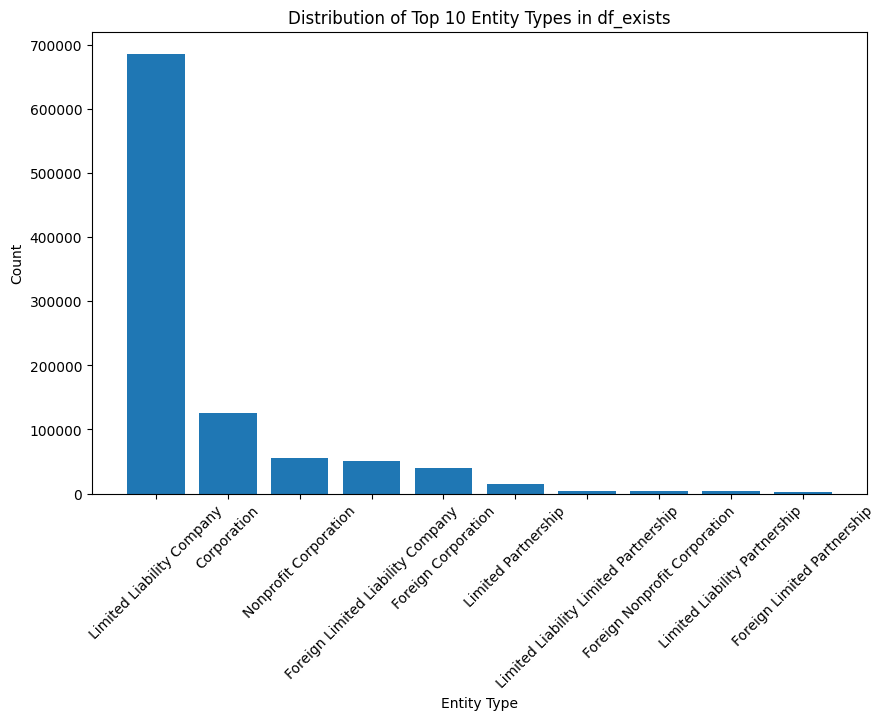

In [34]:
plt.figure(figsize=(10, 6))  # Adjust the width and height as per your preference
plt.bar(entitytype_counts.index[:10], entitytype_counts.values[:10])
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.title('Distribution of Top 10 Entity Types in df_exists')
plt.xticks(rotation=45)
plt.show()

In [37]:
import plotly.graph_objects as go

top_10_entity_types = df_exists['entitytype'].value_counts().head(10)

fig = go.Figure(data=[go.Bar(
    x=top_10_entity_types.index,
    y=top_10_entity_types.values
)])

fig.update_layout(
    title='Distribution of Top 10 Entity Types in df_exists',
    xaxis=dict(title='Entity Type'),
    yaxis=dict(title='Count'),
    xaxis_tickangle=-45
)

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed